In [152]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, LSTM
from mlxtend.plotting import plot_confusion_matrix
from keras import callbacks

In [153]:
## load the data
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [154]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [155]:
corr_mat = df.corr()
corr_mat

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<Axes: >

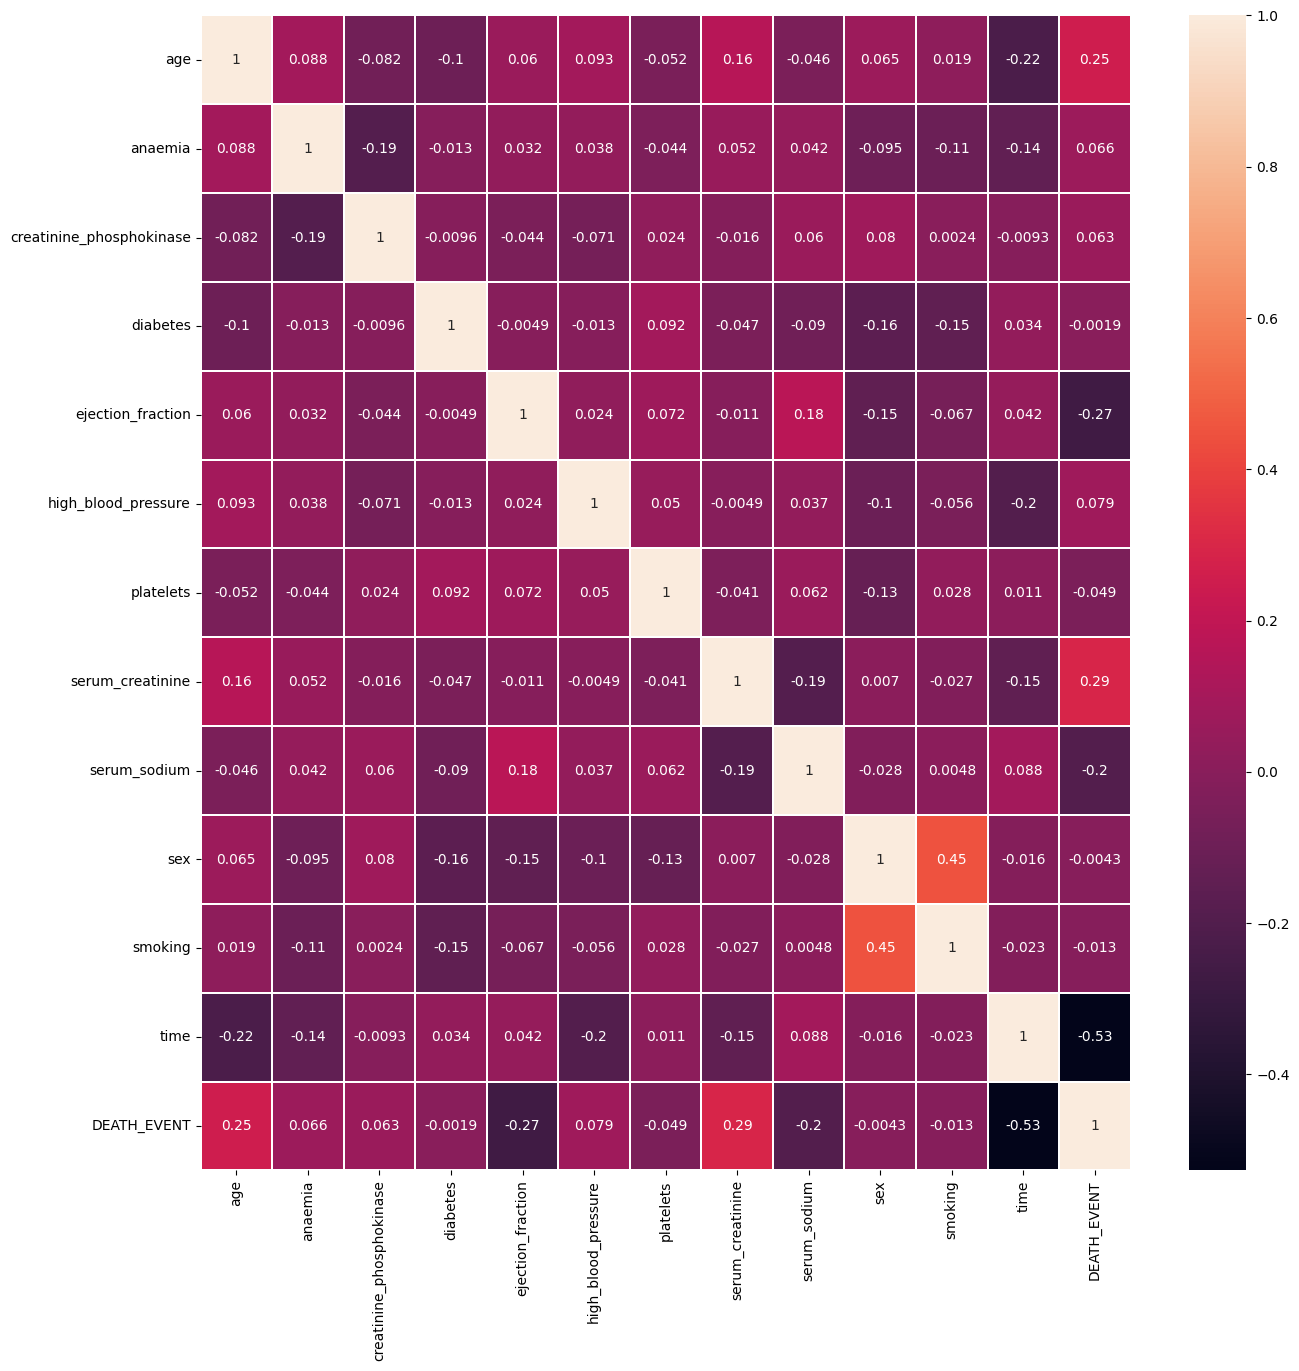

In [156]:
## heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_mat,annot=True, linewidths=0.1)

In [157]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [159]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

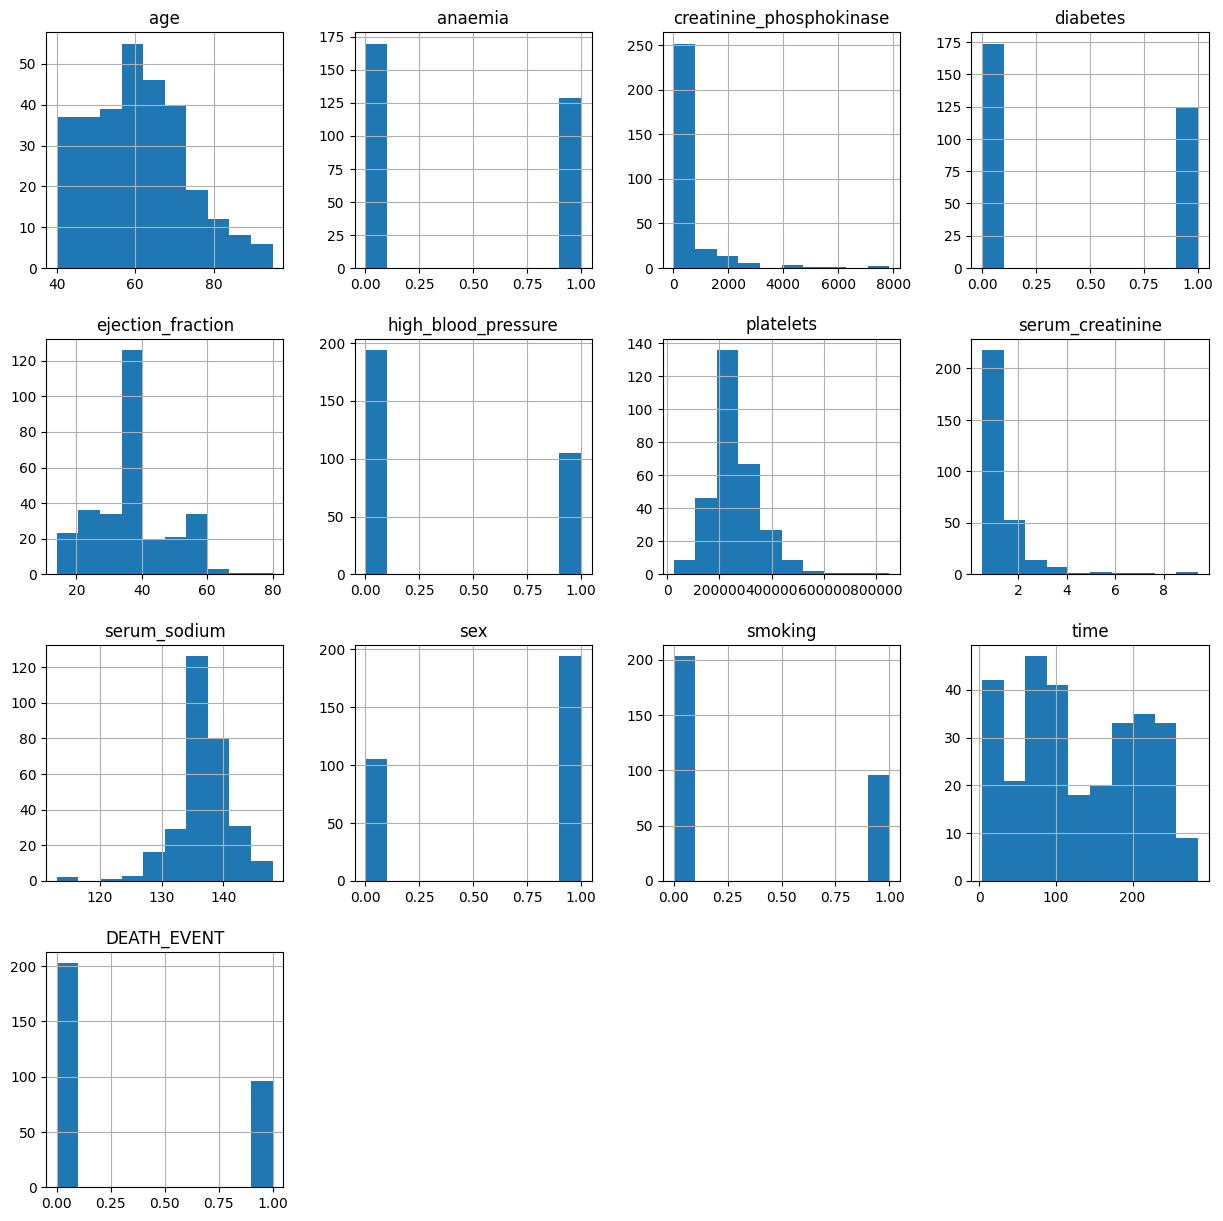

In [160]:
df.hist(bins= 10, figsize=(15,15))
plt.show()

In [161]:
## split the data into independent and dependent variable
X=df.drop(["DEATH_EVENT"],axis=1)
y=df["DEATH_EVENT"]

In [162]:

# Setting up a standard scaler for the features and analyzing it thereafter
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)   
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


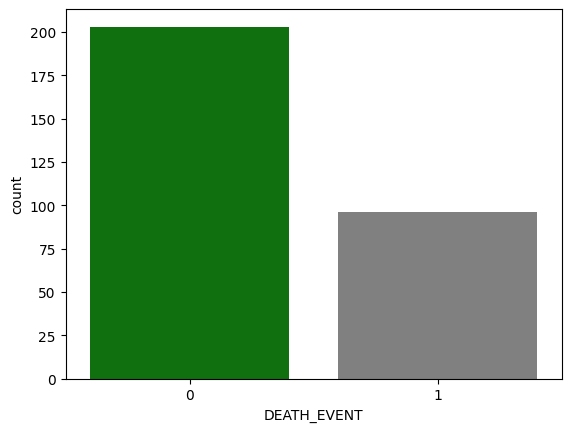

In [163]:
cols= ["green","grey"]
ax = sns.countplot(x= df["DEATH_EVENT"], palette = cols)

In [164]:
#spliting variables into training and test sets
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=25)

In [165]:
## TRAIN THE LOGISTIC REGRESSION
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [166]:
##  make the prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

,Actual,Predicted
81,0,0
176,0,0
121,0,0
87,0,0
239,0,0
...,...,...
134,0,1
0,1,1
293,0,0
153,0,0


In [167]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, pred_LR)

## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, pred_LR)

print(accuracy_LR)
print(conf_mat)


0.8444444444444444
[[53  7]
 [ 7 23]]


In [168]:
## naives bayes
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [169]:
## predict the test set
y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_NB})

,Actual,Predicted
81,0,0
176,0,0
121,0,0
87,0,0
239,0,0
...,...,...
134,0,1
0,1,1
293,0,0
153,0,0


In [170]:
## Evaluate the naive bayes model
accuracy_NB = accuracy_score(y_test, y_pred_NB)
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)


print(accuracy_NB)
print(conf_mat_NB)

0.7444444444444445
[[51  9]
 [14 16]]


In [171]:
## K-Nearest Neighbors
Knn_model = KNeighborsClassifier(n_neighbors=5)
##train my model
Knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [172]:
## Make prediction
y_pred_knn = Knn_model.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})

,Actual,Predicted
81,0,0
176,0,0
121,0,0
87,0,0
239,0,0
...,...,...
134,0,0
0,1,0
293,0,0
153,0,0


In [173]:
## Evaluate the naive bayes model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)


print(accuracy_knn)
print(conf_mat_knn)

0.7222222222222222
[[52  8]
 [17 13]]


In [174]:
## Decision tree classifier
Decision_tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5) 
Decision_tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5) 
Decision_tree_max_depth = DecisionTreeClassifier(max_depth=5)

In [175]:
## trainiong my models
Decision_tree_gini.fit(X_train,y_train)
Decision_tree_entropy.fit(X_train,y_train)
Decision_tree_max_depth.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [176]:
## make prediction
y_pred_gini = Decision_tree_gini.predict(X_test)
y_pred_entropy = Decision_tree_entropy.predict(X_test)
y_pred_depth3 = Decision_tree_max_depth.predict(X_test)

In [177]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gini})

,Actual,Predicted
81,0,0
176,0,0
121,0,0
87,0,0
239,0,0
...,...,...
134,0,0
0,1,1
293,0,0
153,0,0


In [178]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_entropy})

,Actual,Predicted
81,0,0
176,0,0
121,0,0
87,0,0
239,0,0
...,...,...
134,0,0
0,1,1
293,0,0
153,0,0


In [179]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_depth3})

,Actual,Predicted
81,0,0
176,0,0
121,0,0
87,0,0
239,0,0
...,...,...
134,0,1
0,1,1
293,0,0
153,0,0


In [180]:
## model evaluation
## Evaluate the gini
accuracy_gini = accuracy_score(y_test, y_pred_gini)
conf_mat_gini = confusion_matrix(y_test, y_pred_gini)




print(accuracy_gini)
print(conf_mat_gini)

0.8222222222222222
[[54  6]
 [10 20]]


In [181]:
## Evaluate the entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
conf_mat_entropy = confusion_matrix(y_test, y_pred_entropy)


print(accuracy_entropy)
print(conf_mat_entropy)

0.8444444444444444
[[52  8]
 [ 6 24]]


In [182]:
## Evaluate the max_depth
accuracy_max_depth = accuracy_score(y_test, y_pred_depth3)
conf_mat_max_depth = confusion_matrix(y_test, y_pred_depth3)


print(accuracy_max_depth)
print(conf_mat_max_depth)

0.7777777777777778
[[50 10]
 [10 20]]


In [183]:
## SVM
#Create a SVM Classifier
clfLinear = svm.SVC(kernel='linear')
clfsigmoid = svm.SVC(kernel='sigmoid') 
clfrbf = svm.SVC(kernel='rbf') 

In [184]:

#Train the model using the training sets
clfLinear.fit(X_train, y_train)
clfsigmoid.fit(X_train, y_train)
clfrbf.fit(X_train, y_train)

SVC()

In [185]:
#Predict the response for test dataset
y_pred_linear = clfLinear.predict(X_test)
y_pred_sigmoid = clfsigmoid.predict(X_test)
y_pred_rbf = clfrbf.predict(X_test)


In [186]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})

,Actual,Predicted
81,0,0
176,0,0
121,0,0
87,0,0
239,0,0
...,...,...
134,0,1
0,1,1
293,0,0
153,0,0


In [187]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_sigmoid})

,Actual,Predicted
81,0,0
176,0,0
121,0,0
87,0,0
239,0,0
...,...,...
134,0,1
0,1,1
293,0,0
153,0,0


In [188]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rbf})

,Actual,Predicted
81,0,0
176,0,0
121,0,0
87,0,0
239,0,0
...,...,...
134,0,1
0,1,1
293,0,0
153,0,0


In [189]:
#Calculate the accuracy of our model
print("Linear Kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_linear))
print("Sigmoid kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_sigmoid))
print("rbf kernelAccuracy:",metrics.accuracy_score(y_test, y_pred_rbf))

Linear Kernel Accuracy: 0.7777777777777778
Sigmoid kernel Accuracy: 0.8
rbf kernelAccuracy: 0.7888888888888889


In [190]:
## confussion matrix for the kernels
conf_mat_linear = confusion_matrix(y_test, y_pred_linear)
conf_mat_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
conf_mat_rbf = confusion_matrix(y_test, y_pred_rbf)

print(conf_mat_linear)
print(conf_mat_sigmoid)
print(conf_mat_rbf)

[[51  9]
 [11 19]]
[[51  9]
 [ 9 21]]
[[51  9]
 [10 20]]


<Axes: >

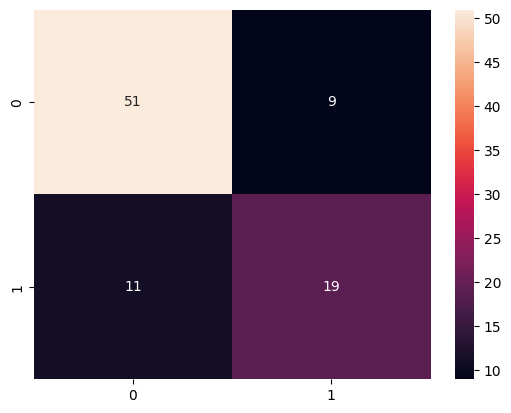

In [191]:
## classification report
sns.heatmap(conf_mat_linear, annot=True, fmt='.0f')

In [192]:
## classification report
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        60
           1       0.68      0.63      0.66        30

    accuracy                           0.78        90
   macro avg       0.75      0.74      0.75        90
weighted avg       0.77      0.78      0.78        90



<Axes: >

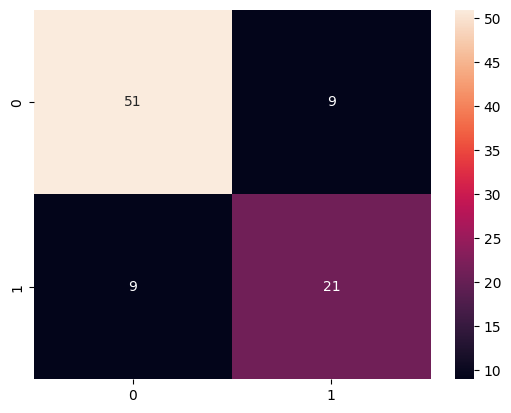

In [193]:
## classification report
sns.heatmap(conf_mat_sigmoid, annot=True, fmt='.0f')

In [194]:
print(classification_report(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        60
           1       0.70      0.70      0.70        30

    accuracy                           0.80        90
   macro avg       0.77      0.77      0.77        90
weighted avg       0.80      0.80      0.80        90



<Axes: >

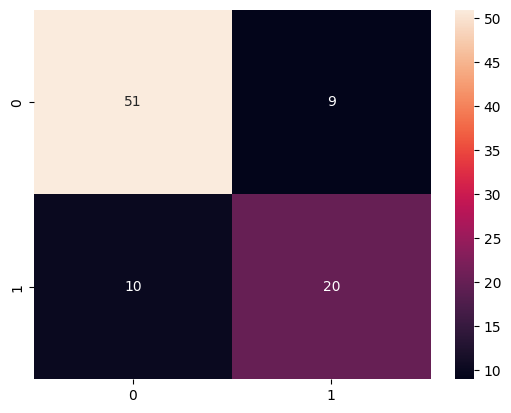

In [195]:
##  classification report
sns.heatmap(conf_mat_rbf, annot=True, fmt='.0f')

In [196]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84        60
           1       0.69      0.67      0.68        30

    accuracy                           0.79        90
   macro avg       0.76      0.76      0.76        90
weighted avg       0.79      0.79      0.79        90



In [197]:
## ROC CURVE for the y_pred_linear
auc = roc_auc_score(y_test, y_pred_linear)
print('AUC: %f' %auc)

AUC: 0.741667


In [198]:
## ROC CURVE for y_pred_sigmoid
auc = roc_auc_score(y_test, y_pred_sigmoid)
print('AUC: %f' %auc)

AUC: 0.775000


In [199]:
## ROC CURVE for rbf
auc = roc_auc_score(y_test, y_pred_rbf)
print('AUC: %f' %auc)

AUC: 0.758333


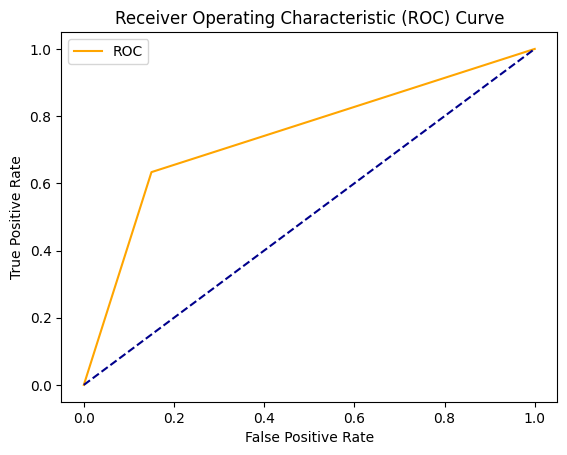

In [200]:
## ROC CURVE for y_pred_linear
fpr, tpr = roc_curve(y_test, y_pred_linear)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

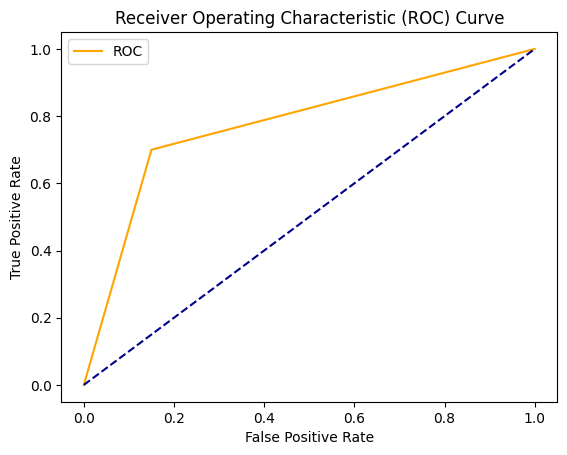

In [201]:
## ROC CURVE for y_pred_sigmoid
fpr, tpr = roc_curve(y_test, y_pred_sigmoid)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

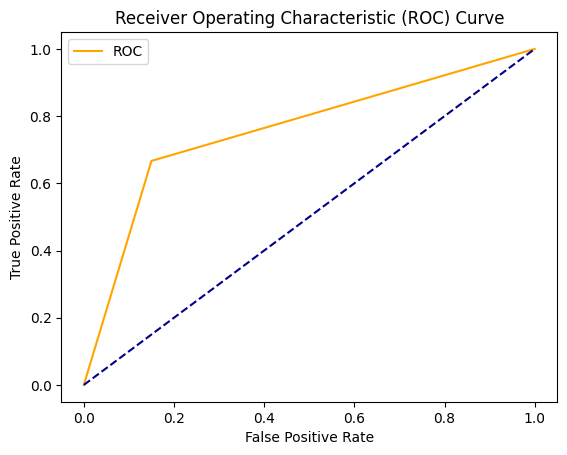

In [202]:
## ROC CURVE for y_pred_sigmoid
fpr, tpr = roc_curve(y_test, y_pred_rbf)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [203]:
## Neural Network
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
 restore_best_weights=True)

## initialise the NN
model = Sequential()

##set up the layers
## input layer
model.add(Dense(units= 16, kernel_initializer= 'uniform', activation = 'relu', input_dim = 12))
## hidden layer
model.add(Dense(units= 8, kernel_initializer= 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units= 8, kernel_initializer= 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
##output layer
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid'))

## compiling the ANN

model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])

In [204]:
## train the model
history = model.fit(X_train, y_train, batch_size = 25, epochs = 200, callbacks=[early_stopping], validation_split=0.3)

Epoch 1/200
6/6 [==============================] - 1s 39ms/step - loss: 0.6931 - accuracy: 0.5137 - val_loss: 0.6923 - val_accuracy: 0.8095
Epoch 2/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6925 - accuracy: 0.6301 - val_loss: 0.6907 - val_accuracy: 0.8095
Epoch 3/200
6/6 [==============================] - 0s 8ms/step - loss: 0.6917 - accuracy: 0.6301 - val_loss: 0.6892 - val_accuracy: 0.8095
Epoch 4/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6912 - accuracy: 0.6301 - val_loss: 0.6876 - val_accuracy: 0.8095
Epoch 5/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6906 - accuracy: 0.6301 - val_loss: 0.6859 - val_accuracy: 0.8095
Epoch 6/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6899 - accuracy: 0.6301 - val_loss: 0.6843 - val_accuracy: 0.8095
Epoch 7/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6892 - accuracy: 0.6301 - val_loss: 0.6826 - val_accuracy: 0.8095
Epoch 8/200
6/6 [=========

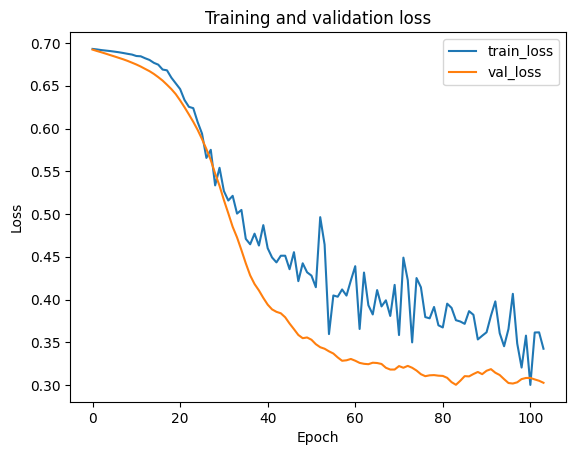

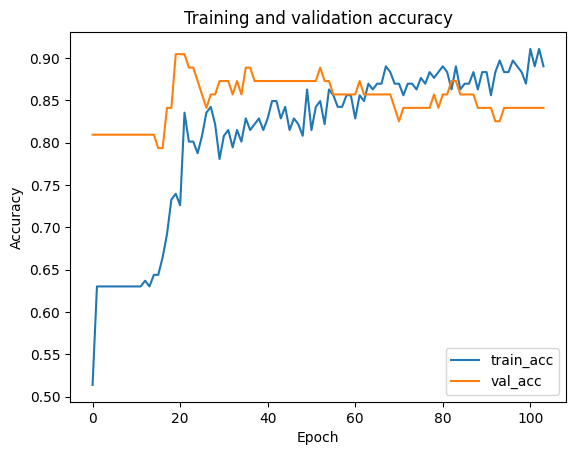

In [205]:
# Train/validation loss curve
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Train/validation accuracy curve
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [206]:
## make prediction
y_pred_ann = model.predict(X_test)
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)

3/3 [==============================] - 0s 2ms/step


In [207]:
## make a dataframe prediction
print(y_test.shape)
print(y_pred_ann.shape)

(90,)
(90, 1)


In [208]:
## make a dataframe prediction
y_pred_ann = y_pred_ann.flatten()

In [209]:
## make a dataframe prediction
print(y_test.shape)
print(y_pred_ann.shape)

(90,)
(90,)


In [210]:
## make a dataframe prediction 
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ann})

,Actual,Predicted
81,0,0
176,0,0
121,0,0
87,0,0
239,0,0
...,...,...
134,0,1
0,1,1
293,0,0
153,0,0


In [211]:
##classification report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        60
           1       0.67      0.73      0.70        30

    accuracy                           0.79        90
   macro avg       0.76      0.77      0.77        90
weighted avg       0.80      0.79      0.79        90



In [212]:
cm = confusion_matrix(y_test, y_pred_ann)
cm

array([[49, 11],
       [ 8, 22]], dtype=int64)

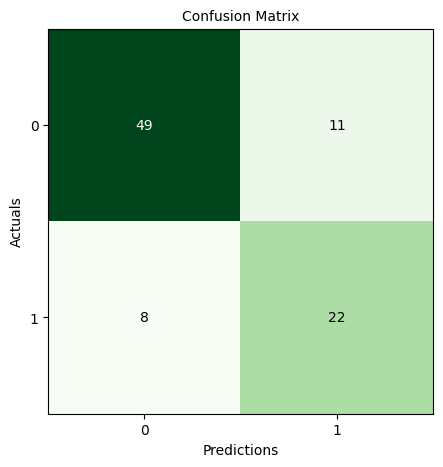

In [213]:
## plot a confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5, 5), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [214]:
auc = roc_auc_score(y_test, y_pred_ann)
print('AUC: %f' %auc)

AUC: 0.775000


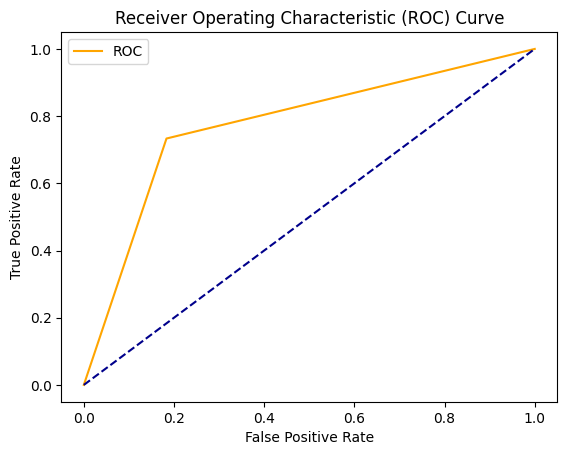

In [215]:
fpr, tpr = roc_curve(y_test, y_pred_ann)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [218]:
## save the model
model.save('ann_model')

2023-02-24 06:52:16.222 WARNING absl: Found untraced functions such as _update_step_xla while saving (showing 1 of 1). These functions will not be directly callable after loading.
2023-02-24 06:52:16.694 INFO    tensorflow: Assets written to: ann_model\assets


In [220]:
## save the logistic regression model
import pickle
#sace the model as a file
with open ('logistic_regression_model.pkl','wb') as file:
    pickle.dump(model_LR,file)